# K-Nearest Neighbors Classification

We've seen how to use $k$-nearest neighbors for regression problems, where the response variable is quantitative. We can also use $k$-nearest neighbors for classification problems, where the response variable is categorical.

The idea is the same. To predict the response for a new set of inputs, we look at the class labels of the $k$-nearest neighbors. The most common class label is the prediction for the new input.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

data = pd.read_csv("/data/titanic.csv")

In [2]:
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


### Exercise 1

Fit a 5-nearest neighbors model to predict `survived` from `age`, `sex`, and `class`. Predict whether a 20-year old female in first-class would survive. What about a 20-year old female in third-class?

In [5]:
data_train = data[['age', 'sex', 'class', 'survived']].dropna()
train = pd.get_dummies(data_train[['sex', 'class']])
train = train.drop('sex_female', axis=1).drop('class_First', axis=1)
train['age'] = data_train['age']

In [6]:
from sklearn.neighbors import KNeighborsClassifier

# YOUR CODE HERE
model = KNeighborsClassifier(n_neighbors=5)
model.fit(train, data_train['survived'])

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [9]:
print('20-year old female in First class:', model.predict_proba([[0, 0, 0, 20.0]])[:,1])
print('20-year old female in Third class:',model.predict_proba([[0, 0, 1, 20.0]])[:,1])

20-year old female in First class: [ 0.6]
20-year old female in Third class: [ 0.4]


In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score

### Exercise 2

Use cross-validation to determine the optimal number of neighbors $k$, as measured by F1 score. Plot the training and test error curves as a function of $k$.

In [19]:
from sklearn.model_selection import cross_val_score

train_f1 = []
test_f1 = []
y = data_train['survived']
for k in range(1,100):
    model = KNeighborsClassifier(k)
    X_standard = (train - train.mean() / train.std())
    model.fit(X_standard, y)
    
    test_f1.append(cross_val_score(model, X_standard, y, cv=10,
                                   scoring='f1').mean())
    
    y_pred = model.predict(X_standard)
    precision = sum((y_pred == 1) & (y == 1)) / sum(y_pred == 1)
    recall = sum((y_pred == 1) & (y == 1)) / sum(y == 1)
    train_f1.append(1 / ((1 / precision + 1 / recall) / 2) )


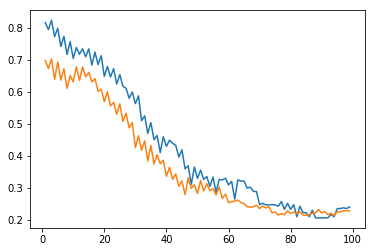

In [20]:
plt.plot(range(1,100), train_f1, '-')
plt.plot(range(1,100), test_f1, '-')